## Implementing Naive Bayes Classifier (manually)

#### Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
data = pd.read_csv('play.csv')

data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


#### Check if there are any null values

In [3]:
data.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

***There seems to be no null values in the dataset***

### Visualize the dataset

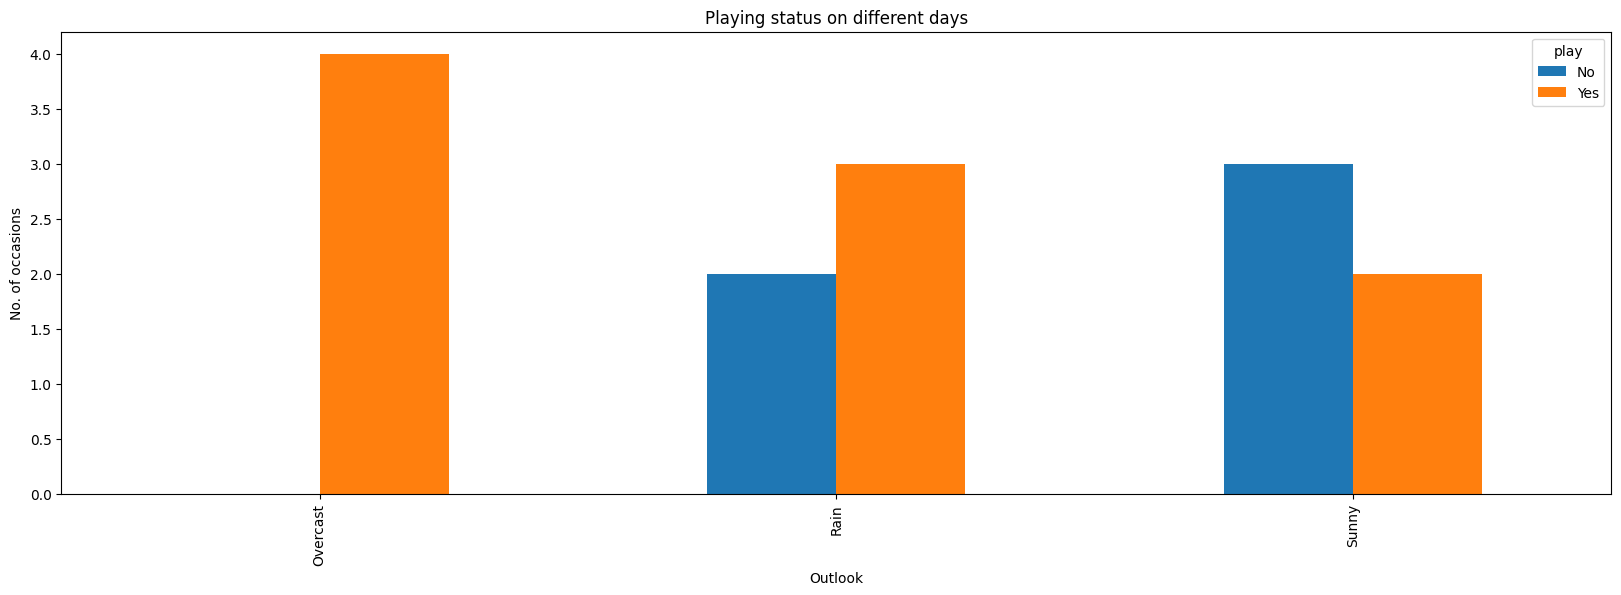

In [21]:
pd.crosstab(data.outlook, data.play).plot(kind = "bar", figsize = (20, 6))

plt.title('Playing status on different days')
plt.xlabel('Outlook')
plt.ylabel('No. of occasions')

plt.show()

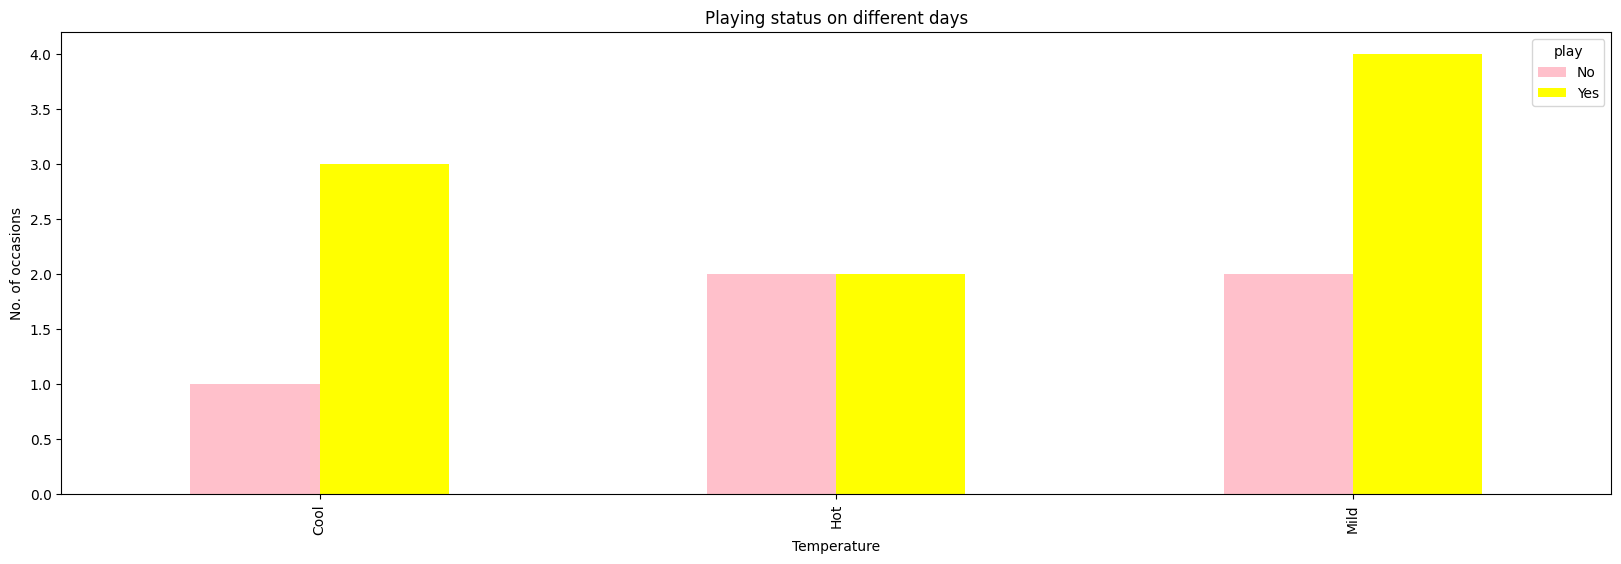

In [30]:
pd.crosstab(data.temp, data.play).plot(kind = "bar", figsize = (20, 6), color = ['pink', 'yellow'])

plt.title('Playing status on different days')
plt.xlabel('Temperature')
plt.ylabel('No. of occasions')

plt.show()

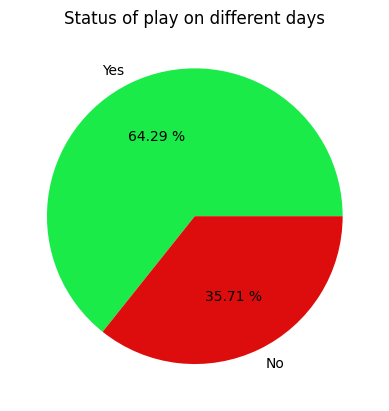

In [28]:
play_y = data[data['play'] == 'Yes'].count()[0]
play_n = len(data) - play_y

plt.title("Status of play on different days")

plt.pie([play_y, play_n], labels = ['Yes', 'No'], colors = ['#1aeb49', '#de0d0d'], autopct = '%.2f %%')

plt.show()

### Find class prior probabilities

In [4]:
# total number of results
size = len(data)

# yes outputs
yes = data[data.play == 'Yes'].count()[0]

# no outputs
no = data[data.play == 'No'].count()[0]

##### Probability of play = Yes

In [5]:
prob_yes = yes / size
print(prob_yes)

0.6428571428571429


##### Probability of play = No

In [6]:
prob_no = no / size
print(prob_no)

0.35714285714285715


***Wind does not affect the probability of play, we can drop that feature***

In [7]:
data = data.drop('wind', axis = 1)
data.head()

,day,outlook,temp,humidity,play
0,D1,Sunny,Hot,High,No
1,D2,Sunny,Hot,High,No
2,D3,Overcast,Hot,High,Yes
3,D4,Rain,Mild,High,Yes
4,D5,Rain,Cool,Normal,Yes


### Find the conditional probabilities

##### Probability of outlook = Rain and play = Yes

In [8]:
# find number of instances when it rains and play is there
outlook_yes = data.loc[(data['outlook'] == 'Rain') & (data['play'] == 'Yes')].count()[0]

prob_outlook_yes = outlook_yes / yes

prob_outlook_yes

0.3333333333333333

##### Probability of outlook = Rain and play = No

In [9]:
# find number of instances when it rains and play is not there
outlook_no = data.loc[(data['outlook'] == 'Rain') & (data['play'] == 'No')].count()[0]

prob_outlook_no = outlook_no / no

prob_outlook_no

0.4

##### Probability of temp = Cool and play = Yes

In [10]:
# find number of instances when it is cool and play is there
temp_yes = data.loc[(data['temp'] == 'Cool') & (data['play'] == 'Yes')].count()[0]

prob_temp_yes = temp_yes / yes

prob_temp_yes

0.3333333333333333

##### Probability of temp = Cool and play = No

In [11]:
# find number of instances when it is cool and play is not there
temp_no = data.loc[(data['temp'] == 'Cool') & (data['play'] == 'No')].count()[0]

prob_temp_no = temp_no / no

prob_temp_no

0.2

##### Probability of humidity = High and play = Yes

In [12]:
# find number of instances when humidity is high and play is there
humidity_yes = data.loc[(data['humidity'] == 'High') & (data['play'] == 'Yes')].count()[0]

prob_humidity_yes = humidity_yes / yes

prob_humidity_yes

0.3333333333333333

##### Probability of humidity = High and play = No

In [13]:
# find number of instances when humidity is high and play is not there
humidity_no = data.loc[(data['humidity'] == 'High') & (data['play'] == 'No')].count()[0]

prob_humidity_no = humidity_no / no

prob_humidity_no

0.8

### Probability of Play = Yes for (Rain, Cool, High)

In [14]:
prob_play_yes = prob_yes * prob_outlook_yes * prob_temp_yes * prob_humidity_yes

prob_play_yes

0.023809523809523808

### Probability of Play = No for (Rain, Cool, High)

In [15]:
prob_play_no = prob_no * prob_outlook_no * prob_temp_no * prob_humidity_no

prob_play_no

0.022857142857142864

### Classify the instance given

In [16]:
play_yes = prob_play_yes / (prob_play_yes + prob_play_no)
play_no = prob_play_no / (prob_play_yes + prob_play_no)

#### Whether play will be there or not

In [17]:
if (play_yes > play_no):
    print("Play will be there")
else:
    print("Play will not be there")

Play will be there


## Implementing Naive Bayes using sklearn

#### Load necessary libraries

In [31]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Split data into training and testing sets

In [32]:
features = data.iloc[:, 1:-1]
target = data.play

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 100)

#### Create Label Encoder

In [34]:
encoder = LabelEncoder()

#### Transform the labels

In [36]:
outlook_encoded = encoder.fit_transform(x_train.outlook)

In [37]:
temp_encoded = encoder.fit_transform(x_train.temp)

In [38]:
humidity_encoded = encoder.fit_transform(x_train.humidity)

In [39]:
y_train_encoded = encoder.fit_transform(y_train)

In [40]:
x_train_encoded = []

for i in range(len(x_train)):
    x_train_encoded.append([outlook_encoded[i], temp_encoded[i], humidity_encoded[i]])

In [41]:
x_train_encoded

[[1, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [2, 1, 0],
 [2, 2, 1],
 [2, 2, 0],
 [1, 2, 0],
 [1, 2, 0],
 [2, 0, 1]]

#### Build the model

In [43]:
classifier = CategoricalNB()

#### Train the model

In [44]:
classifier.fit(x_train_encoded, y_train_encoded)

CategoricalNB()

### Predict the output

***(Rain, Cool, High) = (1, 0, 1)***

In [45]:
prediction = classifier.predict([[1, 0, 1]])

In [46]:
if (prediction[0] == 1):
    print("Play will be there")
else:
    print("Play will not be there")

Play will be there


### Hence the result has been verified using sklearn library